AI Cognitive Classification

(Gaurav, Haosheng Ning, Linjing Xu, Milad S)


Need to download google word2vec file in same directory from "https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g". File is big 3.5 gb.Using embedding word2vec not just td-idf, tokenizing and vectorizing words. Used diffrent hyperparameters tuning to get the best parameters for each model. Models: Random forest, knn, svm linear kernel, svm rbf kernel, decision tree, logistic regression. Confusion matrix for each and othee metric evaluation. Comapring results for different models. Taking input question and then predicting from each model perspective. 

In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score,  precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from gensim.models import KeyedVectors
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import GridSearchCV
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Ensure NLTK resources are downloaded
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')

# Load your dataset
df = pd.read_excel('Question.xlsx', sheet_name='Sheet2')
x = df['Questions'].values.tolist()
y = df['Label'].values.tolist()

# Load pre-trained Word2Vec embeddings
word_vectors = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

import string
from nltk.tokenize import RegexpTokenizer

# Function to remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Improved tokenization
def custom_tokenize(text):
    tokenizer = RegexpTokenizer(r'\w+')  # This will match words only, excluding punctuation
    return tokenizer.tokenize(text)

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# Using Lemmatization instead of Stemming
def lemmatize_words(words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

# Updated function for preprocessing text
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Remove special characters
    text = remove_punctuation(text)
    # Custom Tokenization
    words = custom_tokenize(text)
    # Remove stopwords and lemmatization
    stop_words = set(stopwords.words('english'))
    words = lemmatize_words([word for word in words if word not in stop_words])
    return ' '.join(words)

# Modified vectorization function with TF-IDF weighting
def vectorize_text(text, index):
    words = word_tokenize(text)
    word_vecs = []
    for word in words:
        if word in word_vectors:
            try:
                tfidf_weight = tfidf_weights_matrix[index, tfidf_vectorizer.vocabulary_[word]]
            except KeyError:
                tfidf_weight = 1
            word_vecs.append(word_vectors[word] * tfidf_weight)
    if not word_vecs:
        return np.zeros(word_vectors.vector_size)
    return np.mean(word_vecs, axis=0)


# Calculate TF-IDF weights
tfidf_vectorizer = TfidfVectorizer()
tfidf_weights_matrix = tfidf_vectorizer.fit_transform([preprocess_text(text) for text in x])

# Preprocess and vectorize your questions
# X_vectorized = np.array([vectorize_text(preprocess_text(text)) for text in x])

# Vectorize questions with TF-IDF weights
X_vectorized = np.array([vectorize_text(preprocess_text(text), i) for i, text in enumerate(x)])


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2)


model_results = {}




[nltk_data] Downloading package punkt to /Users/gaurav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gaurav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/gaurav/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/gaurav/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9845201238390093
              precision    recall  f1-score   support

     Analyze       0.99      0.98      0.99       235
       Apply       0.98      0.99      0.99       218
      Create       0.96      0.99      0.98       184
    Evaluate       0.99      1.00      0.99       206
    Remember       1.00      0.96      0.98       212
  Understand       0.99      0.98      0.99       237

    accuracy                           0.98      1292
   macro avg       0.98      0.98      0.98      1292
weighted avg       0.98      0.98      0.98      1292



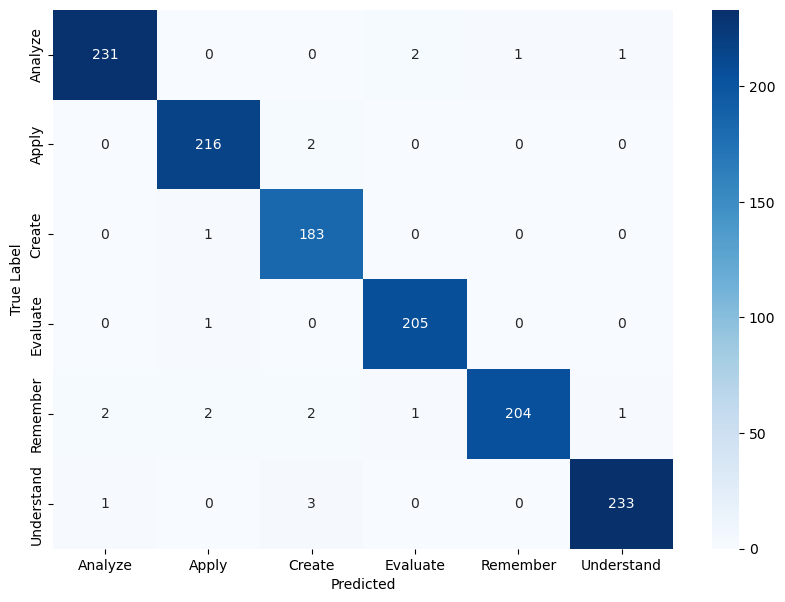

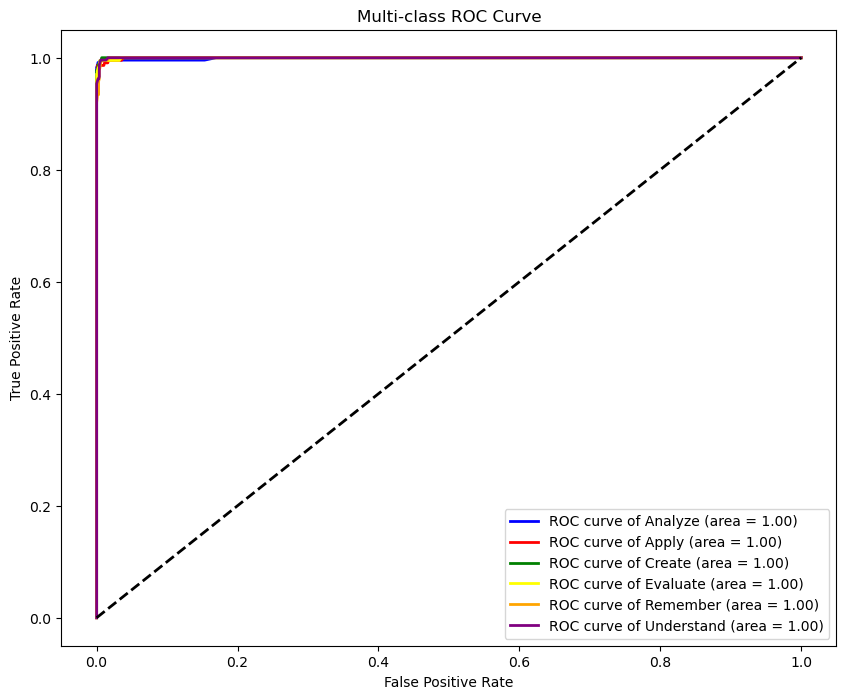

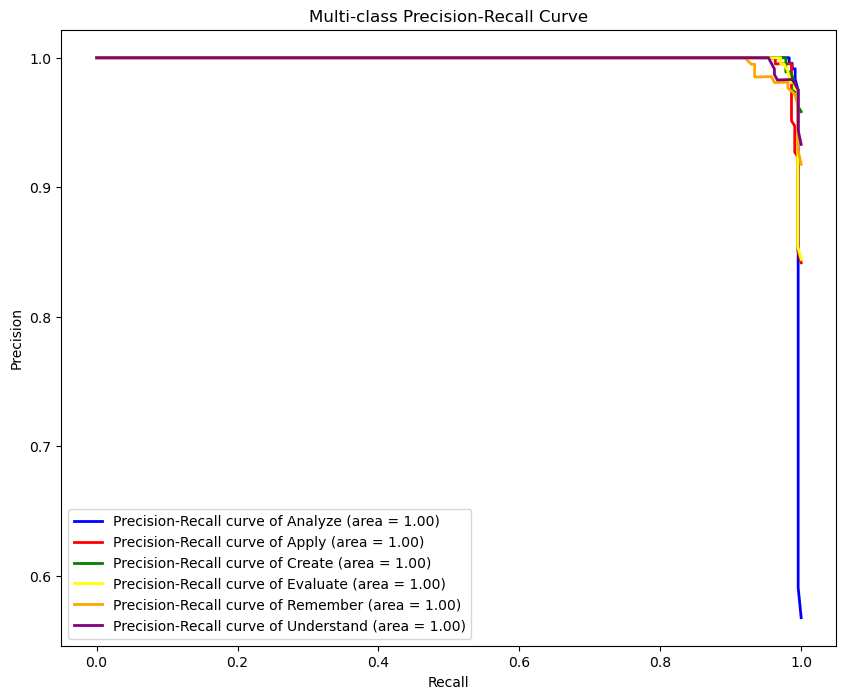

In [2]:
## Random Forest

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from itertools import cycle

## Random Forest
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=0, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters: ", grid_search.best_params_)

# Train the model using the best parameters
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
# y_pred = model.predict(X_test)

RF_cm = confusion_matrix(y_test, y_pred)
RF_accuracy = accuracy_score(y_test, y_pred)
RF_recall = recall_score(y_test, y_pred, average='weighted')
RF_precision = precision_score(y_test, y_pred, average='weighted')
RF_f1 = f1_score(y_test, y_pred, average='weighted')


# Storing and printing results
model_results['Random Forest'] = {
    'Confusion Matrix': RF_cm, 
    'Accuracy': RF_accuracy, 
    'Recall': RF_recall,
    'Precision': RF_precision,
    'F1 Score': RF_f1
}


# RF_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", RF_accuracy)
print(classification_report(y_test, y_pred))

labels = sorted(set(y_test))

# Create and plot the confusion matrix
# RF_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, fmt="d")
sns.heatmap(RF_cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.savefig("ConfusionMatrixRF.png")
plt.show()


# Binarize the output labels for multi-class ROC and Precision-Recall curves
y_test_binarized = label_binarize(y_test, classes=sorted(set(y)))
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], best_model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], best_model.predict_proba(X_test)[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], best_model.predict_proba(X_test)[:, i])



class_names = sorted(set(y))

plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, 
             label=f'ROC curve of {class_names[i]} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc='lower right')
plt.savefig("ROCRF.png")
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
#     plt.plot(recall[i], precision[i], color=color, lw=2, label=f'Precision-Recall curve of class {i} (area = {average_precision[i]:0.2f})')
      plt.plot(recall[i], precision[i], color=color, lw=2, label=f'Precision-Recall curve of {class_names[i]} (area = {average_precision[i]:0.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multi-class Precision-Recall Curve')
plt.legend(loc='lower left')
plt.savefig("precisionrecallRF.png")
plt.show()

/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

Best Parameters for KNN:  {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
KNN Accuracy: 0.9907120743034056
              precision    recall  f1-score   support

     Analyze       0.98      0.99      0.99       235
       Apply       1.00      1.00      1.00       218
      Create       1.00      0.98      0.99       184
    Evaluate       0.98      1.00      0.99       206
    Remember       1.00      0.98      0.99       212
  Understand       0.98      1.00      0.99       237

    accuracy                           0.99      1292
   macro avg       0.99      0.99      0.99      1292
weighted avg       0.99      0.99      0.99      1292



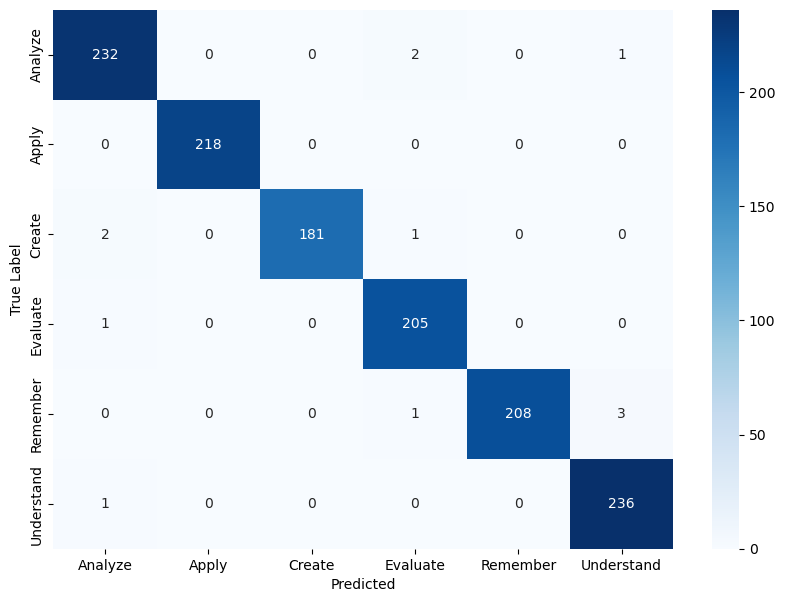

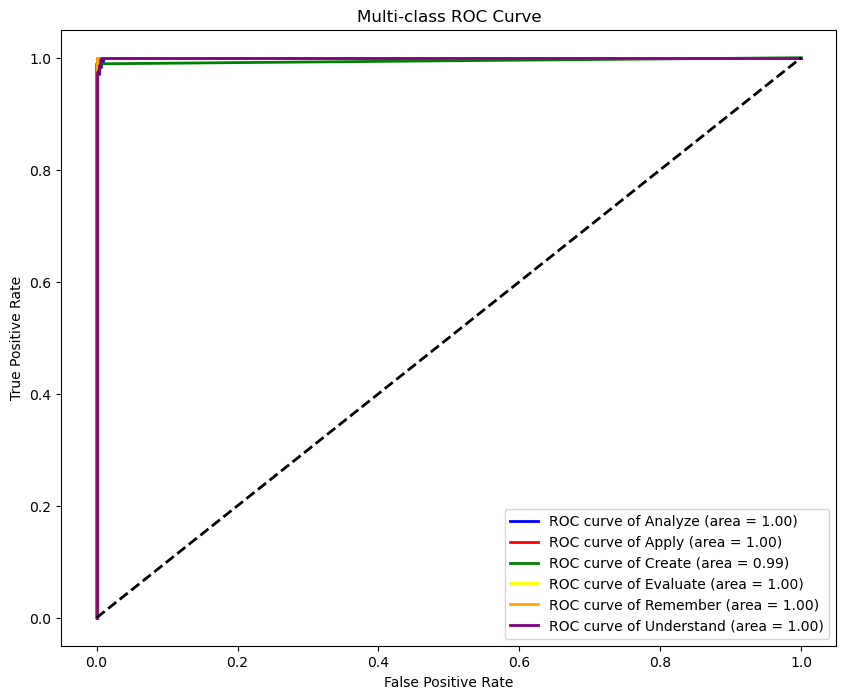

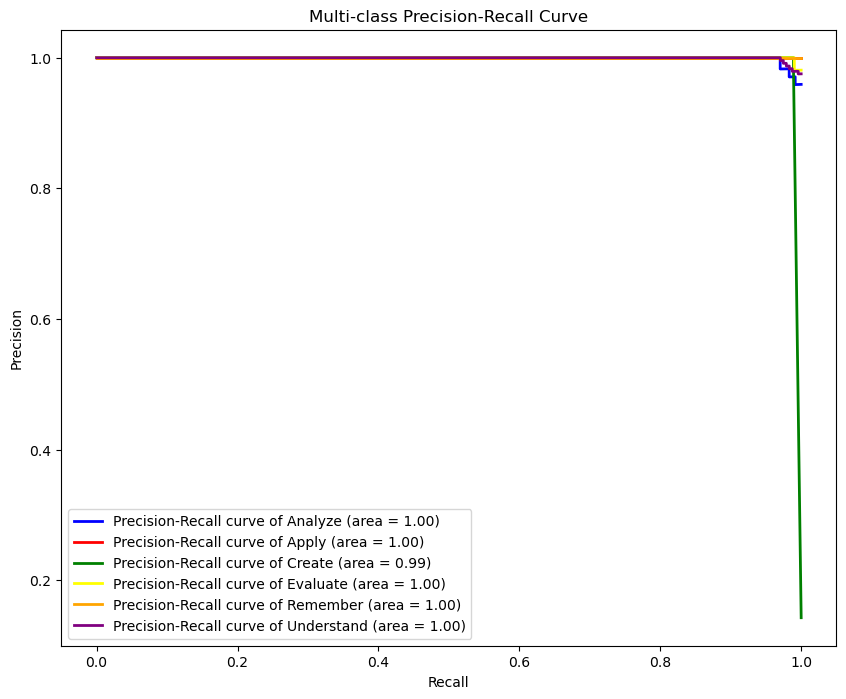

In [3]:
## KNN

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for KNN with a range for n_neighbors
param_grid_knn = {
    'n_neighbors': list(range(3, 11)), 
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}


# Create a GridSearchCV object for KNN
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, 
                               cv=3, n_jobs=-1, verbose=0, scoring='accuracy')

# Fit the grid search to the data
grid_search_knn.fit(X_train, y_train)

# Best parameters for KNN
print("Best Parameters for KNN: ", grid_search_knn.best_params_)

# Train the KNN model using the best parameters
best_knn_model = grid_search_knn.best_estimator_

# Evaluate the best KNN model
y_pred_knn = best_knn_model.predict(X_test)

knn_cm = confusion_matrix(y_test, y_pred_knn)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn, average='weighted')
knn_precision = precision_score(y_test, y_pred_knn, average='weighted')
knn_f1 = f1_score(y_test, y_pred_knn, average='weighted')


# Storing and printing results
model_results['KNN'] = {
    'Confusion Matrix': knn_cm, 
    'Accuracy': knn_accuracy, 
    'Recall': knn_recall, 
    'Precision': knn_precision,
    'F1 Score': knn_f1
}



# Accuracy and Classification Report for KNN
# knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_accuracy)
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix for KNN
# knn_cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10, 7))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.savefig("ConfusionMatrixknn.png")
plt.show()


# Binarize the output labels for multi-class ROC and Precision-Recall curves
y_test_binarized = label_binarize(y_test, classes=sorted(set(y)))
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], best_knn_model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], best_knn_model.predict_proba(X_test)[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], best_knn_model.predict_proba(X_test)[:, i])



class_names = sorted(set(y))

plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, 
             label=f'ROC curve of {class_names[i]} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc='lower right')
plt.savefig("ROCknn.png")
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
#     plt.plot(recall[i], precision[i], color=color, lw=2, label=f'Precision-Recall curve of class {i} (area = {average_precision[i]:0.2f})')
      plt.plot(recall[i], precision[i], color=color, lw=2, label=f'Precision-Recall curve of {class_names[i]} (area = {average_precision[i]:0.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multi-class Precision-Recall Curve')
plt.legend(loc='lower left')
plt.savefig("precisionrecallknn.png")
plt.show()

Best Parameters for SVM:  {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
SVM Accuracy: 0.9953560371517027
              precision    recall  f1-score   support

     Analyze       1.00      1.00      1.00       235
       Apply       0.99      1.00      0.99       218
      Create       0.99      0.99      0.99       184
    Evaluate       1.00      1.00      1.00       206
    Remember       1.00      0.99      1.00       212
  Understand       1.00      1.00      1.00       237

    accuracy                           1.00      1292
   macro avg       1.00      1.00      1.00      1292
weighted avg       1.00      1.00      1.00      1292



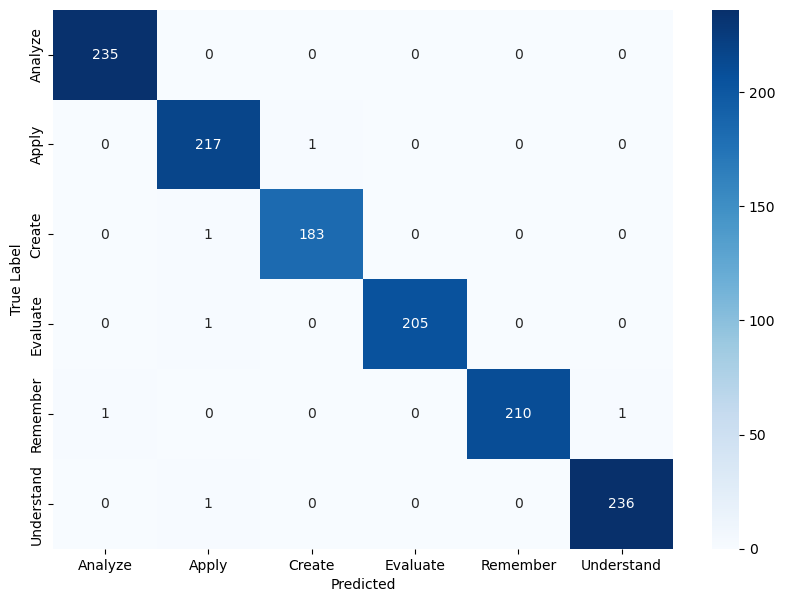

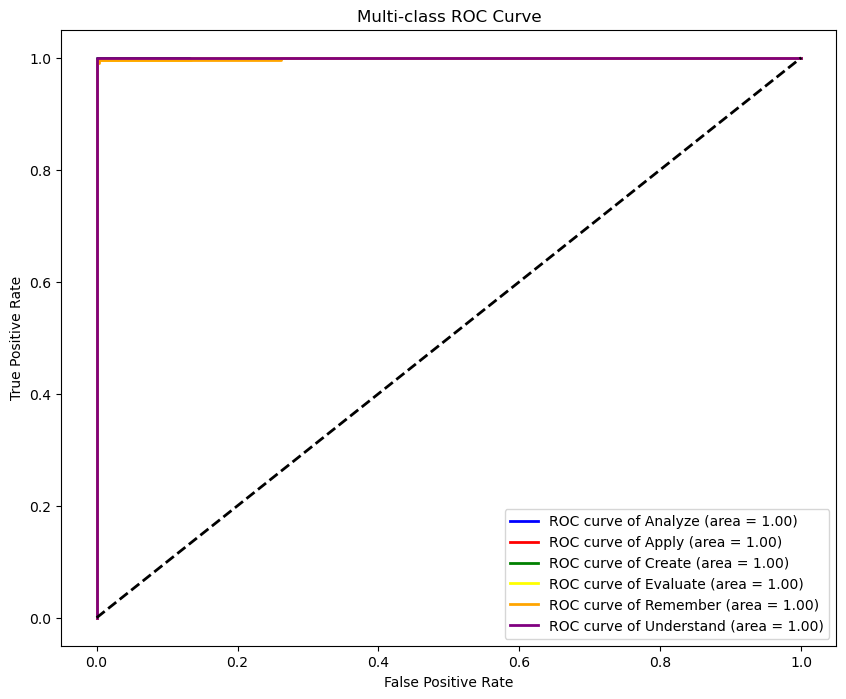

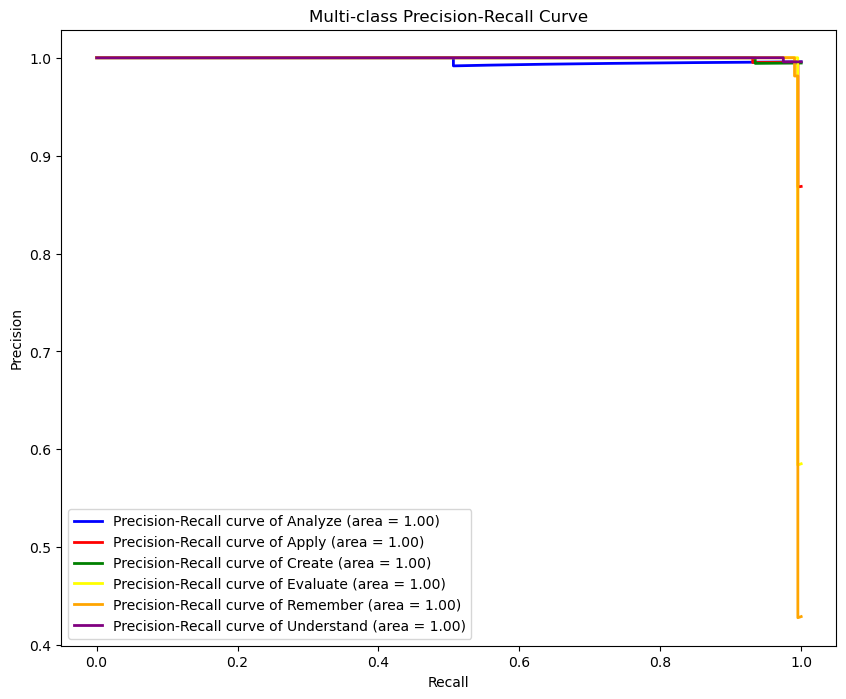

In [4]:
## SVM Linear

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from itertools import cycle

## SVM linear kernel
from sklearn.svm import SVC

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['linear']  # Specifies the kernel type to be used in the algorithm
}


# Create a GridSearchCV object for SVM
grid_search_svm = GridSearchCV(estimator=SVC(probability=True), param_grid=param_grid_svm, 
                               cv=3, n_jobs=-1, verbose=0, scoring='accuracy')

# Fit the grid search to the data
grid_search_svm.fit(X_train, y_train)

# Best parameters for SVM
print("Best Parameters for SVM: ", grid_search_svm.best_params_)

# Train the SVM model using the best parameters
best_svm_model = grid_search_svm.best_estimator_

# Evaluate the best SVM model
y_pred_svm = best_svm_model.predict(X_test)


svm_cm = confusion_matrix(y_test, y_pred_svm)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm, average='weighted')
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')


# Storing and printing results
model_results['SVM Linear'] = {
    'Confusion Matrix': svm_cm, 
    'Accuracy': svm_accuracy, 
    'Recall': svm_recall, 
    'Precision': svm_precision,
    'F1 Score': svm_f1
}




# Accuracy and Classification Report for SVM
# svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix for SVM
# svm_cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 7))
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.savefig("ConfusionMatrixsvm.png")
plt.show()

# Binarize the output labels for multi-class ROC and Precision-Recall curves
y_test_binarized = label_binarize(y_test, classes=sorted(set(y)))
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], best_svm_model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], best_svm_model.predict_proba(X_test)[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], best_svm_model.predict_proba(X_test)[:, i])



class_names = sorted(set(y))

plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, 
             label=f'ROC curve of {class_names[i]} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc='lower right')
plt.savefig("ROCsvm.png")
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
#     plt.plot(recall[i], precision[i], color=color, lw=2, label=f'Precision-Recall curve of class {i} (area = {average_precision[i]:0.2f})')
      plt.plot(recall[i], precision[i], color=color, lw=2, label=f'Precision-Recall curve of {class_names[i]} (area = {average_precision[i]:0.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multi-class Precision-Recall Curve')
plt.legend(loc='lower left')
plt.savefig("precisionrecallSVM.png")
plt.show()




Best Parameters for SVM (RBF):  {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
SVM (RBF) Accuracy: 0.9969040247678018
              precision    recall  f1-score   support

     Analyze       0.99      1.00      1.00       235
       Apply       1.00      1.00      1.00       218
      Create       1.00      1.00      1.00       184
    Evaluate       1.00      0.99      1.00       206
    Remember       1.00      1.00      1.00       212
  Understand       1.00      1.00      1.00       237

    accuracy                           1.00      1292
   macro avg       1.00      1.00      1.00      1292
weighted avg       1.00      1.00      1.00      1292



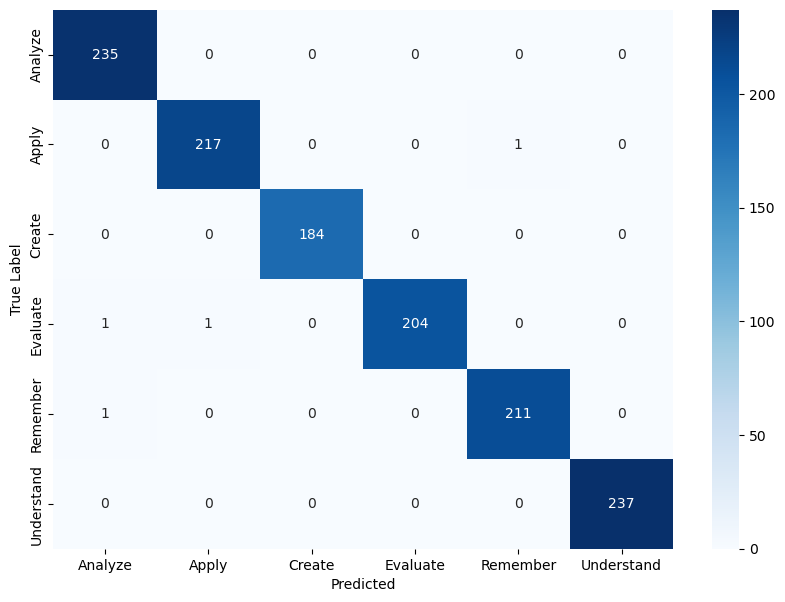

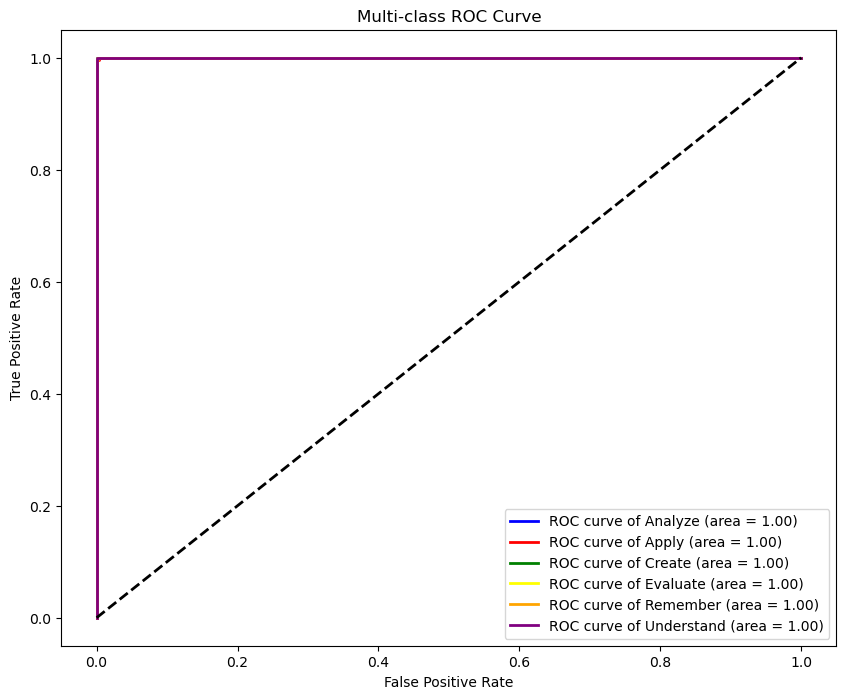

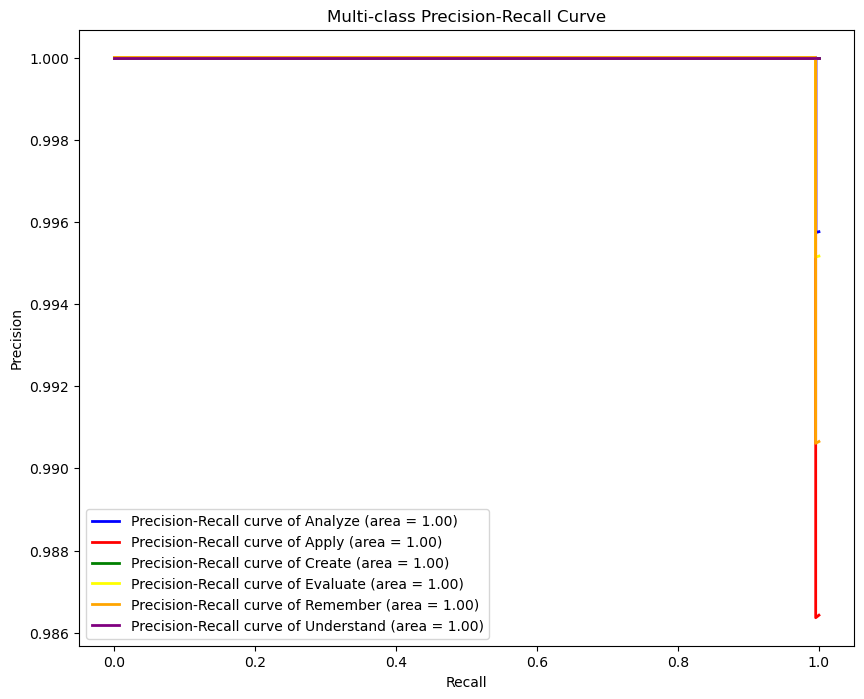

In [5]:
## SVM RBF
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from itertools import cycle

## SVM RBF kernel

# Define the parameter grid for SVM with RBF kernel
param_grid_svm_rbf = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1, 10, 100],  # Kernel coefficient
    'kernel': ['rbf']  # Specifies the RBF kernel to be used in the algorithm
}

# Create a GridSearchCV object for SVM with RBF kernel
grid_search_svm_rbf = GridSearchCV(estimator=SVC(probability = True), param_grid=param_grid_svm_rbf, 
                                   cv=3, n_jobs=-1, verbose=0, scoring='accuracy')

# Fit the grid search to the data
grid_search_svm_rbf.fit(X_train, y_train)

# Best parameters for SVM with RBF kernel
print("Best Parameters for SVM (RBF): ", grid_search_svm_rbf.best_params_)

# Train the SVM model using the best parameters
best_svm_rbf_model = grid_search_svm_rbf.best_estimator_

# Evaluate the best SVM model
y_pred_svm_rbf = best_svm_rbf_model.predict(X_test)

svm_rbf_cm = confusion_matrix(y_test, y_pred_svm_rbf)
svm_rbf_accuracy = accuracy_score(y_test, y_pred_svm_rbf)
svm_rbf_recall = recall_score(y_test, y_pred_svm_rbf, average='weighted')
svm_rbf_precision = precision_score(y_test, y_pred_svm_rbf, average='weighted')
svm_rbf_f1 = f1_score(y_test, y_pred_svm_rbf, average='weighted')


# Storing and printing results
model_results['SVM RBF'] = {
    'Confusion Matrix': svm_rbf_cm, 
    'Accuracy': svm_rbf_accuracy, 
    'Recall': svm_rbf_recall, 
    'Precision': svm_rbf_precision,
    'F1 Score': svm_rbf_f1
}

# Accuracy and Classification Report for SVM with RBF kernel
# svm_rbf_accuracy = accuracy_score(y_test, y_pred_svm_rbf)
print("SVM (RBF) Accuracy:", svm_rbf_accuracy)
print(classification_report(y_test, y_pred_svm_rbf))

# Confusion Matrix for SVM with RBF kernel
# svm_rbf_cm = confusion_matrix(y_test, y_pred_svm_rbf)
plt.figure(figsize=(10, 7))
sns.heatmap(svm_rbf_cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.savefig("ConfusionMatrixrbf.png")
plt.show()

# Binarize the output labels for multi-class ROC and Precision-Recall curves
y_test_binarized = label_binarize(y_test, classes=sorted(set(y)))
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], best_svm_rbf_model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], best_svm_rbf_model.predict_proba(X_test)[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], best_svm_rbf_model.predict_proba(X_test)[:, i])



class_names = sorted(set(y))

plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, 
             label=f'ROC curve of {class_names[i]} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc='lower right')
plt.savefig("ROCrbf.png")
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
#     plt.plot(recall[i], precision[i], color=color, lw=2, label=f'Precision-Recall curve of class {i} (area = {average_precision[i]:0.2f})')
      plt.plot(recall[i], precision[i], color=color, lw=2, label=f'Precision-Recall curve of {class_names[i]} (area = {average_precision[i]:0.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multi-class Precision-Recall Curve')
plt.legend(loc='lower left')
plt.savefig("precisionrecallrbf.png")
plt.show()





Best Parameters for Decision Tree:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Accuracy: 0.705108359133127
              precision    recall  f1-score   support

     Analyze       0.73      0.73      0.73       235
       Apply       0.72      0.75      0.73       218
      Create       0.70      0.72      0.71       184
    Evaluate       0.72      0.79      0.75       206
    Remember       0.63      0.58      0.60       212
  Understand       0.71      0.68      0.69       237

    accuracy                           0.71      1292
   macro avg       0.70      0.71      0.70      1292
weighted avg       0.70      0.71      0.70      1292



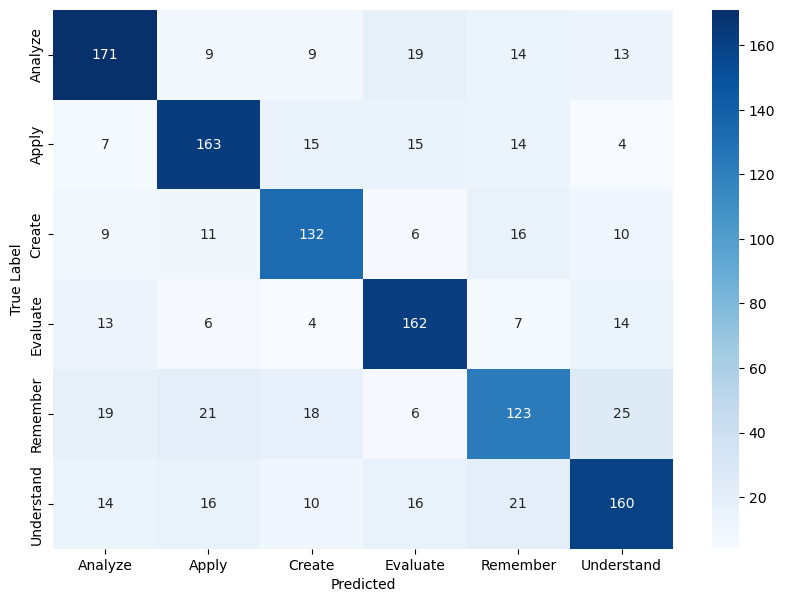

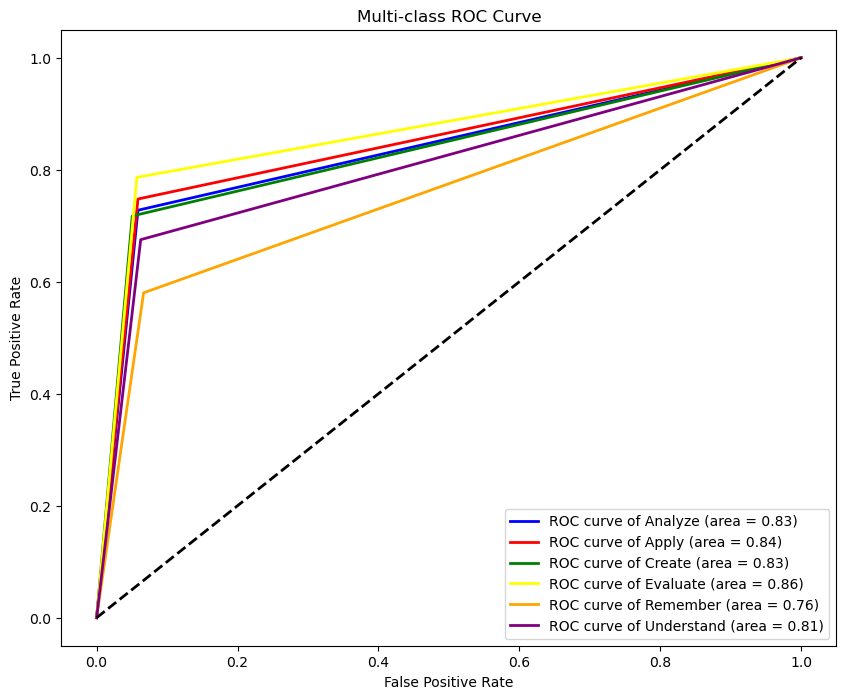

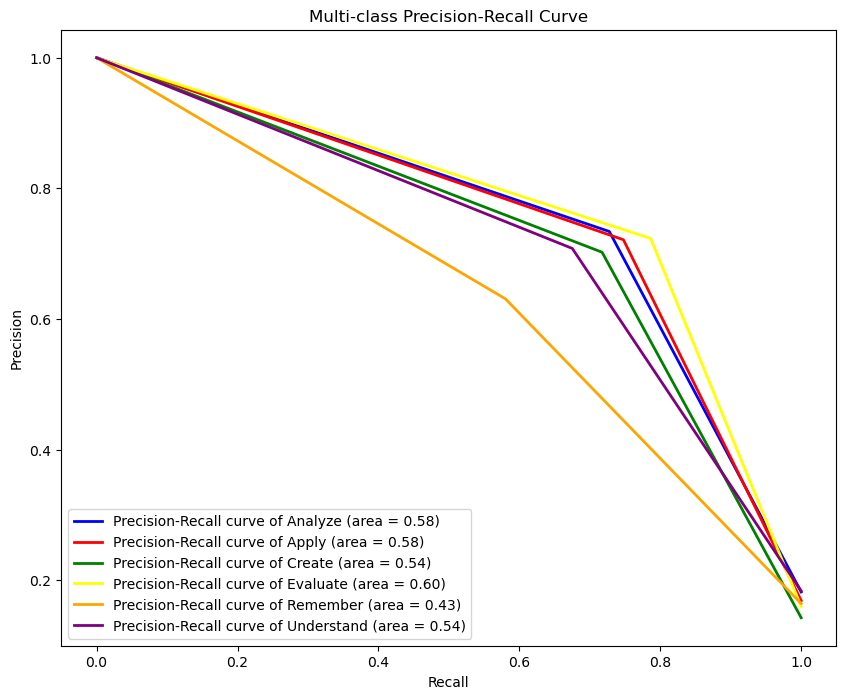

In [6]:
## Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from itertools import cycle

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object for Decision Tree
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_dt, 
                              cv=3, n_jobs=-1, verbose=0, scoring='accuracy')

# Fit the grid search to the data
grid_search_dt.fit(X_train, y_train)

# Best parameters for Decision Tree
print("Best Parameters for Decision Tree: ", grid_search_dt.best_params_)

# Train the Decision Tree model using the best parameters
best_dt_model = grid_search_dt.best_estimator_

# Evaluate the best Decision Tree model
y_pred_dt = best_dt_model.predict(X_test)

dt_cm = confusion_matrix(y_test, y_pred_dt)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt, average='weighted')
dt_precision = precision_score(y_test, y_pred_dt, average='weighted')
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')


# Storing and printing results
model_results['Decision Tree'] = {
    'Confusion Matrix': dt_cm, 
    'Accuracy': dt_accuracy, 
    'Recall': dt_recall,
    'Precision': dt_precision,
    'F1 Score': dt_f1
}

# Accuracy and Classification Report for Decision Tree
# dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix for Decision Tree
# dt_cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10, 7))
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.savefig("ConfusionMatrixdt.png")
plt.show()

# Binarize the output labels for multi-class ROC and Precision-Recall curves
y_test_binarized = label_binarize(y_test, classes=sorted(set(y)))
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], best_dt_model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], best_dt_model.predict_proba(X_test)[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], best_dt_model.predict_proba(X_test)[:, i])



class_names = sorted(set(y))

plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, 
             label=f'ROC curve of {class_names[i]} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc='lower right')
plt.savefig("ROCdt.png")
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
#     plt.plot(recall[i], precision[i], color=color, lw=2, label=f'Precision-Recall curve of class {i} (area = {average_precision[i]:0.2f})')
      plt.plot(recall[i], precision[i], color=color, lw=2, label=f'Precision-Recall curve of {class_names[i]} (area = {average_precision[i]:0.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multi-class Precision-Recall Curve')
plt.legend(loc='lower left')
plt.savefig("precisionrecallDT.png")
plt.show()


/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/gaur

/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/gaur

/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/gaur

Best Parameters for Logistic Regression:  {'C': 100, 'max_iter': 100, 'solver': 'newton-cg'}
Logistic Regression Accuracy: 0.9891640866873065
              precision    recall  f1-score   support

     Analyze       0.99      0.99      0.99       235
       Apply       0.99      1.00      0.99       218
      Create       0.97      0.99      0.98       184
    Evaluate       1.00      0.98      0.99       206
    Remember       0.99      0.99      0.99       212
  Understand       0.99      0.98      0.99       237

    accuracy                           0.99      1292
   macro avg       0.99      0.99      0.99      1292
weighted avg       0.99      0.99      0.99      1292



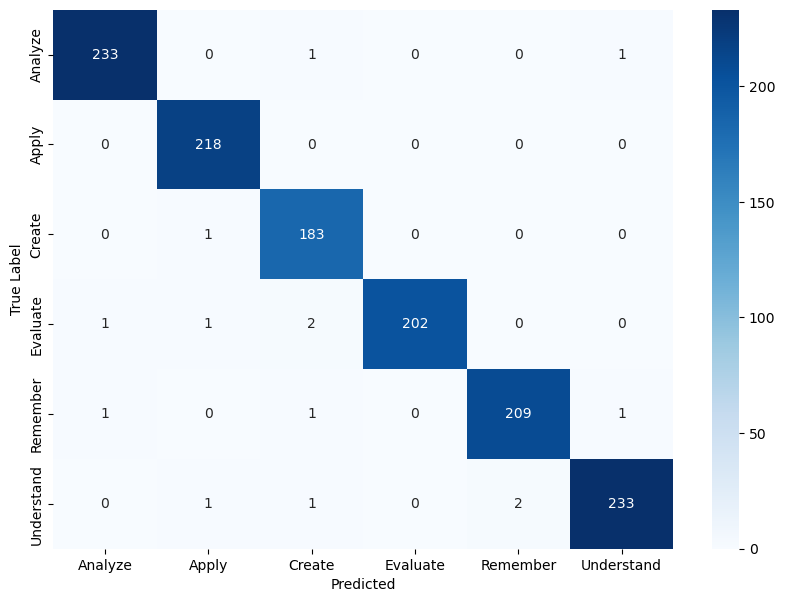

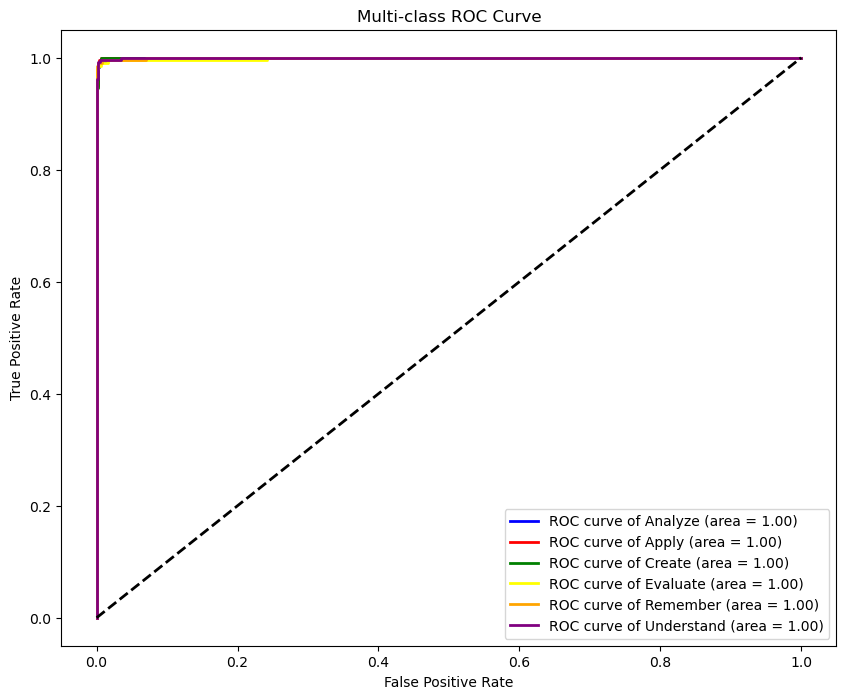

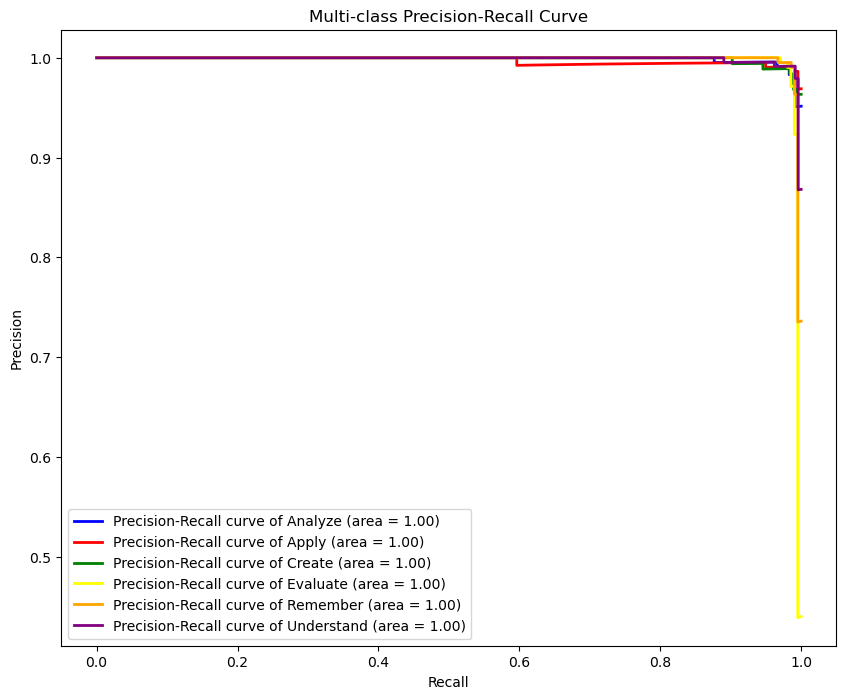

In [7]:
## Logistic Regression

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint


# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['newton-cg', 'liblinear'],  # Algorithm to use in the optimization problem
    'max_iter': [100, 200, 500, 1000, 5000, 10000]
}

# Create a GridSearchCV object for Logistic Regression
grid_search_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_lr, 
                              cv=3, n_jobs=-1, verbose=0, scoring='accuracy')

# Fit the grid search to the data
grid_search_lr.fit(X_train, y_train)

# Best parameters for Logistic Regression
print("Best Parameters for Logistic Regression: ", grid_search_lr.best_params_)

# Train the Logistic Regression model using the best parameters
best_lr_model = grid_search_lr.best_estimator_

# Evaluate the best Logistic Regression model
y_pred_lr = best_lr_model.predict(X_test)

lr_cm = confusion_matrix(y_test, y_pred_lr)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr, average='weighted')
lr_precision = precision_score(y_test, y_pred_lr, average='weighted')
lr_f1 = f1_score(y_test, y_pred_lr, average='weighted')


# Storing and printing results
model_results['Logistic Regression'] = {
    'Confusion Matrix': lr_cm, 
    'Accuracy': lr_accuracy, 
    'Recall': lr_recall,
    'Precision': lr_precision,
    'F1 Score': lr_f1
}

# Accuracy and Classification Report for Logistic Regression
# lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", lr_accuracy)
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix for Logistic Regression
# lr_cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(10, 7))
sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.savefig("ConfusionMatrixLR.png")
plt.show()

# Binarize the output labels for multi-class ROC and Precision-Recall curves
y_test_binarized = label_binarize(y_test, classes=sorted(set(y)))
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], best_lr_model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], best_lr_model.predict_proba(X_test)[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], best_lr_model.predict_proba(X_test)[:, i])



class_names = sorted(set(y))

plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, 
             label=f'ROC curve of {class_names[i]} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc='lower right')
plt.savefig("ROClr.png")
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
#     plt.plot(recall[i], precision[i], color=color, lw=2, label=f'Precision-Recall curve of class {i} (area = {average_precision[i]:0.2f})')
      plt.plot(recall[i], precision[i], color=color, lw=2, label=f'Precision-Recall curve of {class_names[i]} (area = {average_precision[i]:0.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multi-class Precision-Recall Curve')
plt.legend(loc='lower left')
plt.savefig("precisionrecalllr.png")
plt.show()


                                                      Confusion Matrix  \
Random Forest        [[231, 0, 0, 2, 1, 1], [0, 216, 2, 0, 0, 0], [...   
KNN                  [[232, 0, 0, 2, 0, 1], [0, 218, 0, 0, 0, 0], [...   
SVM Linear           [[235, 0, 0, 0, 0, 0], [0, 217, 1, 0, 0, 0], [...   
SVM RBF              [[235, 0, 0, 0, 0, 0], [0, 217, 0, 0, 1, 0], [...   
Decision Tree        [[171, 9, 9, 19, 14, 13], [7, 163, 15, 15, 14,...   
Logistic Regression  [[233, 0, 1, 0, 0, 1], [0, 218, 0, 0, 0, 0], [...   

                     Accuracy    Recall Precision  F1 Score  
Random Forest         0.98452   0.98452  0.984692  0.984514  
KNN                  0.990712  0.990712  0.990808   0.99072  
SVM Linear           0.995356  0.995356   0.99538  0.995359  
SVM RBF              0.996904  0.996904  0.996917  0.996904  
Decision Tree        0.705108  0.705108  0.703856  0.703972  
Logistic Regression  0.989164  0.989164  0.989257  0.989167  


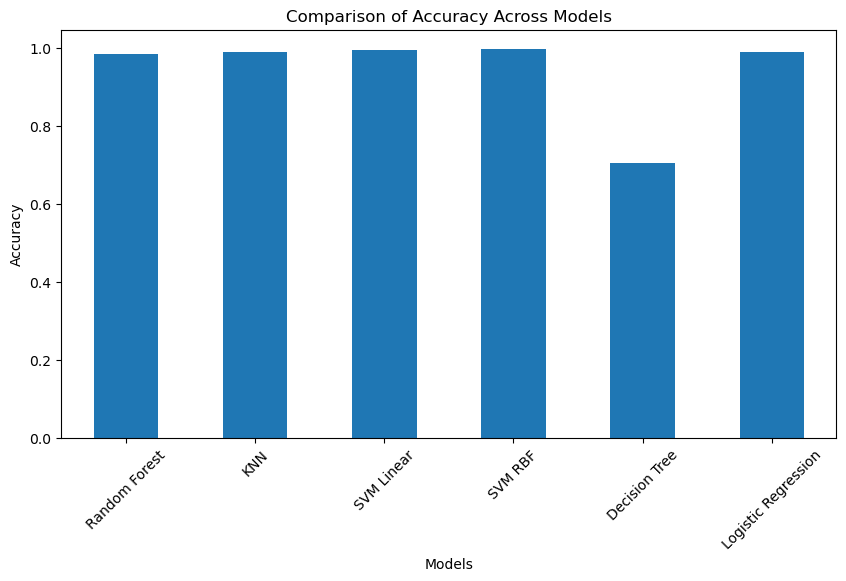

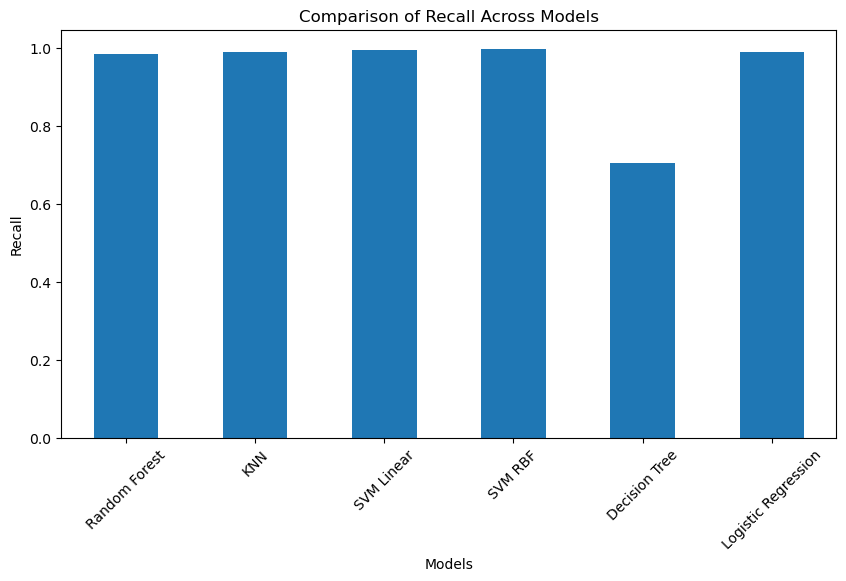

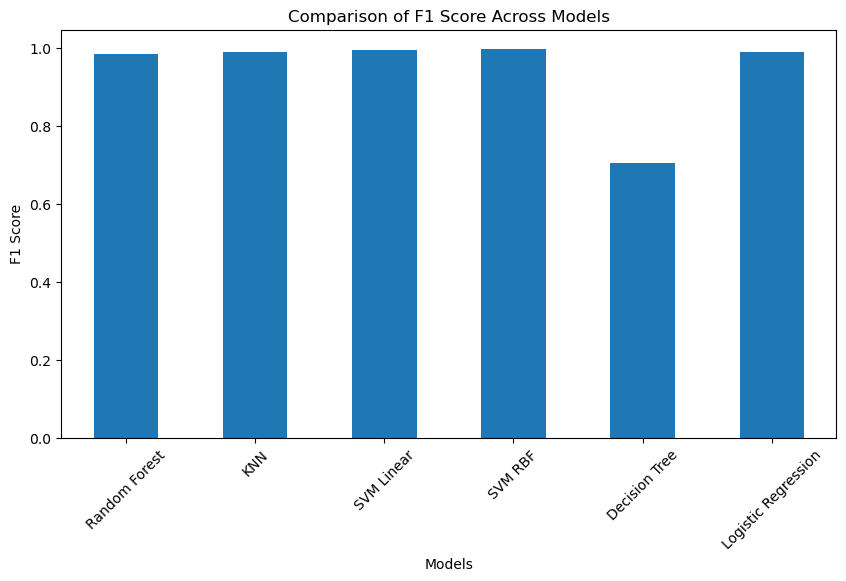

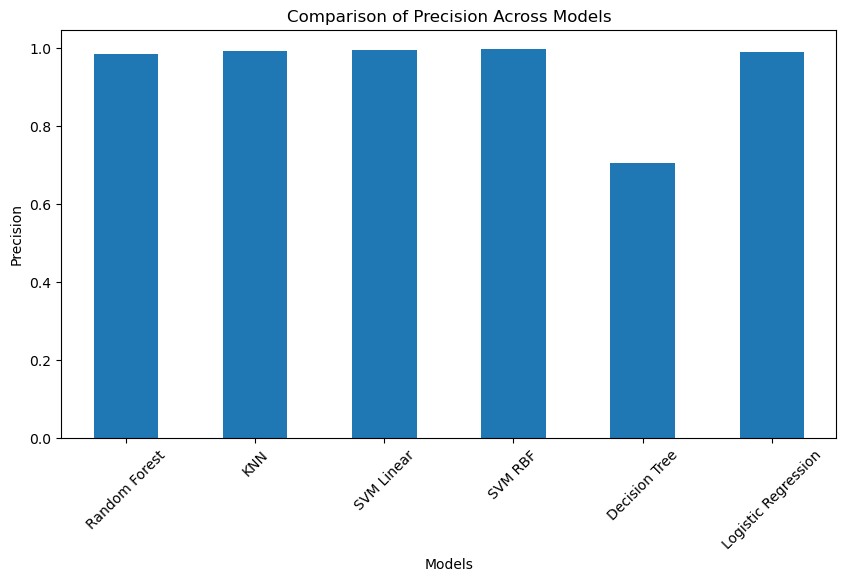

In [8]:
# Convert the model results into a DataFrame
df_results = pd.DataFrame(model_results).T

# Print the DataFrame for a tabular comparison
print(df_results)

# Plotting the results for comparison
# Bar plot for each metric
metrics = ['Accuracy', 'Recall', 'F1 Score', 'Precision']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    df_results[metric].plot(kind='bar')
    plt.title(f'Comparison of {metric} Across Models')
    plt.ylabel(metric)
    plt.xlabel('Models')
    plt.xticks(rotation=45)
    plt.subplots_adjust(bottom=0.20)
    plt.savefig(f"Comparison_{metric}.png")
    plt.show()

In [ ]:
def vectorize_single_question(text):
    preprocessed_text = preprocess_text(text)
    words = word_tokenize(preprocessed_text)
    word_vecs = []
    for word in words:
        if word in word_vectors:
            tfidf_weight = 1  # Default weight if TF-IDF is not applicable
            if word in tfidf_vectorizer.vocabulary_:
                tfidf_weight = tfidf_vectorizer.idf_[tfidf_vectorizer.vocabulary_[word]]
            word_vecs.append(word_vectors[word] * tfidf_weight)
    if not word_vecs:
        return np.zeros(word_vectors.vector_size)
    return np.mean(word_vecs, axis=0)

# Example usage
user_question = "Enter your question here."


def predict_category(question, models):
    # Vectorize the question
    question_vectorized = vectorize_single_question(question).reshape(1, -1)

    # Get predictions from each model
    predictions = {name: model.predict(question_vectorized)[0] for name, model in models.items()}

    return predictions

# Usage
user_question = input("Enter a question (type 'exit' to end): ")
if user_question.lower() != 'exit':
    models = {'RandomForest': best_model, 'KNN': best_knn_model, 'SVM Linear': best_svm_model, 'SVM RBF': best_svm_rbf_model, 'Decision Tree': best_dt_model, 'Logistic Regression': best_lr_model}
    predictions = predict_category(user_question, models)
    for model_name, predicted_category in predictions.items():
        print(f"{model_name} Predicted Category: {predicted_category}")
else:
    print("Exiting.")



In [9]:
from sklearn.metrics import cohen_kappa_score


models = {'RandomForest': best_model, 'KNN': best_knn_model, 'SVM Linear': best_svm_model, 'SVM RBF': best_svm_rbf_model, 'Decision Tree': best_dt_model, 'Logistic Regression': best_lr_model}
 
# Generate predictions from each model
predictions = {model_name: model.predict(X_test) for model_name, model in models.items()}

# Calculate Cohen's Kappa for each pair of models
kappa_scores = {}
for model1_name, preds1 in predictions.items():
    for model2_name, preds2 in predictions.items():
        if model1_name < model2_name:  # This ensures each pair is only compared once
            kappa = cohen_kappa_score(preds1, preds2)
            kappa_scores[(model1_name, model2_name)] = kappa

# Displaying the kappa scores
for model_pair, kappa in kappa_scores.items():
    print(f"Cohen's Kappa between {model_pair[0]} and {model_pair[1]}: {kappa}")


Cohen's Kappa between RandomForest and SVM Linear: 0.980470670375982
Cohen's Kappa between RandomForest and SVM RBF: 0.9804707266038484
Cohen's Kappa between KNN and RandomForest: 0.9720986079537683
Cohen's Kappa between KNN and SVM Linear: 0.9832558018977622
Cohen's Kappa between KNN and SVM RBF: 0.986976669172261
Cohen's Kappa between KNN and Logistic Regression: 0.9767474004601567
Cohen's Kappa between SVM Linear and SVM RBF: 0.9925587128070629
Cohen's Kappa between Decision Tree and RandomForest: 0.6476257983268867
Cohen's Kappa between Decision Tree and KNN: 0.6447698371341131
Cohen's Kappa between Decision Tree and SVM Linear: 0.6429531669655681
Cohen's Kappa between Decision Tree and SVM RBF: 0.6448263330418795
Cohen's Kappa between Decision Tree and Logistic Regression: 0.6411410676713805
Cohen's Kappa between Logistic Regression and RandomForest: 0.9739635737614777
Cohen's Kappa between Logistic Regression and SVM Linear: 0.9869793410055018
Cohen's Kappa between Logistic Regre

<!-- These Cohen's Kappa scores suggest a high degree of agreement between most of the model pairs, particularly between RandomForest, SVM Linear, SVM RBF, and Logistic Regression. Scores close to 1 (like 0.94-0.97) indicate almost perfect agreement. However, the Decision Tree model shows considerably lower agreement with others (around 0.63-0.64), suggesting it makes quite different predictions. High scores could imply redundant models (providing similar information), while lower scores might indicate models capturing different aspects of the data.  -->

The Cohen's Kappa values offer insightful comparisons between various pairs of classifiers used in classification task. Most notably, there is a very high degree of agreement (Kappa values greater than 0.95) between RandomForest and SVM (both Linear and RBF versions), as well as between KNN and SVM models, and Logistic Regression. This exceptionally high agreement, especially the near-perfect alignment between SVM Linear and SVM RBF models, suggests that these classifiers are making almost identical predictions, despite their different underlying algorithms.

In contrast, the Decision Tree classifier demonstrates a moderate level of agreement (Kappa values between 0.64 and 0.65) with the other models, including RandomForest, KNN, SVMs, and Logistic Regression. This moderate agreement indicates that the Decision Tree's predictions are somewhat less aligned with the other models, which might be attributed to its unique decision-making approach using tree-based structures.

Furthermore, models like KNN, RandomForest, and Logistic Regression show high agreement with each other (Kappa values between 0.97 and 0.99), indicating similar performance and prediction patterns. This high level of consistency among most models, except the Decision Tree, suggests that the dataset might be well-defined, allowing these models to capture similar patterns effectively.